In [30]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import pandas as pd

In [31]:
def sigmoid(Z):
    return 1.0 / (1 + np.exp(-Z))
def hyp(theta,X):
    return sigmoid(np.dot(X,theta))

In [32]:
def grad_sig(Z):
    return sigmoid(Z)*(1-sigmoid(Z))

In [33]:
def fp(X,t1,t2):
    a1=X
    a2=hyp(t1.T,a1)
    a2=np.hstack((np.ones((X.shape[0],1)),a2))
    a3=hyp(t2.T,a2)
    return a3,a2,a1

In [34]:
def bp(a1,a2,a3,y3,t1,t2):    
    m=y3.shape[0]
    dt2 = np.dot((a3 - y3).T,a2)
    
    temp = (np.dot((a3 - y3),t2)*(a2*(1-a2)))[:,1:]
    dt1=np.dot(temp.T,a1)
    
    return (1.0 / m) * dt1,(1.0 / m) * dt2

In [35]:
def cost(t1,t2,X,Y,lamda=0):
    m=Y.shape[0]
    a3,a2,a1=fp(X,t1,t2)
    return (-(1.0/m) * np.sum((Y*np.log(a3)) + ((1-Y)*np.log(1-a3)))) + ((lamda / (2.0*m))*(np.sum(t1[:,1:]**2)+np.sum(t2[:,1:]**2)))

In [36]:
def initilize_thetas(input_layer_size,hidden_layer_size,num_labels,e=0.12):
    theta1=(np.random.rand(input_layer_size+1,hidden_layer_size) * (2 * e)) - e
    theta2=(np.random.rand(hidden_layer_size+1,num_labels) * (2 * e)) - e
    return theta1.T,theta2.T

In [37]:
def update(X,Y,num_iter,alpha=0.01,lamda=0,debug=False,div=10):
    
    input_layer_size  = 400
    hidden_layer_size = 25
    num_labels = 10
    t1,t2=initilize_thetas(input_layer_size,hidden_layer_size,num_labels)
    
    costhist=[]
    for i in range(num_iter):
        a3,a2,a1=fp(X,t1,t2)
        dt1,dt2=bp(a1,a2,a3,Y,t1,t2)
        t1 = t1 - (alpha * dt1)
        t2 = t2 - (alpha * dt2)
        c=cost(t1,t2,X,Y,lamda)
        costhist.append(c)
        if debug and i%div==0:
            print("Cost after " ,i," is ",c,' Accuaracy',accuracy(X,Y,t1,t2))
            
    return t1,t2,costhist

In [38]:
def load_data(f):
    s=sio.loadmat(f)
    X,Y=s['X'],s['y']
    g=np.random.randint(0,X.shape[0],100)
    v=X[g,:].reshape(100,20,20)
    k=0
    for i in range(0,10):
        k=v[i*10:((i+1)*10),:]
        if i==0:
            ll=k.reshape(200,20).T
        else:
            ll=np.vstack((ll,k.reshape(200,20).T))
    plt.imshow(ll)
    return X,Y.reshape(-1,1)

In [39]:
def accuracy(X,Y,t1,t2):
    p,_1,_2=fp(X,t1,t2)
    return 100*np.sum(((np.argmax(p,axis=1)))==np.argmax(Y,axis=1))/Y.shape[0]

[0 0 0 0 0 1 0 0 0 0]
(5000, 401) (5000, 10)


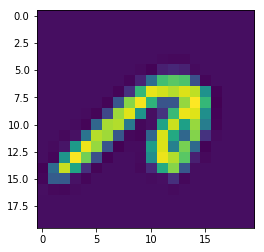

In [40]:
X,y=load_data('../machine-learning-ex4/ex4/ex4data1.mat')
X=np.hstack((np.ones((y.size,1)),X))

Y = pd.get_dummies(y.ravel()).as_matrix() 

idx=3343
plt.imshow(X[idx][1:].reshape(20,20),cmap='gray')
print(Y[idx])
print(X.shape,Y.shape)

In [41]:
w=sio.loadmat('../machine-learning-ex4/ex4/ex4weights.mat')
Theta1,Theta2=w['Theta1'],w['Theta2']
print(Theta1.shape,Theta2.shape)

(25, 401) (10, 26)


In [42]:
print('Initial Cost : ',cost(Theta1,Theta2,X,Y))
print('Cost with lamda = 1 : ',cost(Theta1,Theta2,X,Y,1))

Initial Cost :  0.2876291651613189
Cost with lamda = 1 :  0.38376985909092365


In [43]:
print('Diff of Gradient at Z = 0 :',grad_sig(0))

Diff of Gradient at Z = 0 : 0.25


In [47]:
t1,t2,ch=update(X,Y,1000,0.9,1,debug=True,div=100)
print('Final Accuracy : ',accuracy(X,Y,t1,t2))

Cost after  0  is  3.3753922469848154  Accuaracy 11.04
Cost after  100  is  1.335790762329481  Accuaracy 84.26
Cost after  200  is  0.8624766440948328  Accuaracy 89.74
Cost after  300  is  0.7041586084373159  Accuaracy 91.7
Cost after  400  is  0.6260709505773661  Accuaracy 92.72
Cost after  500  is  0.578004924065786  Accuaracy 93.24
Cost after  600  is  0.544374852441692  Accuaracy 93.78
Cost after  700  is  0.5188196947884723  Accuaracy 94.28
Cost after  800  is  0.49828590324029864  Accuaracy 94.62
Cost after  900  is  0.48115725781008617  Accuaracy 94.92
Final Accuracy :  95.18


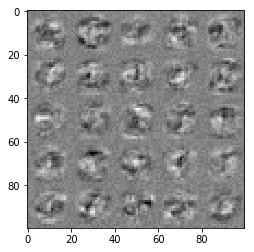

In [61]:
v=t1[:,1:]
for i in range(0,5):
    k=v[i*5:((i+1)*5),:]
    if i==0:
        ll=k.reshape(100,20).T
    else:
        ll=np.vstack((ll,k.reshape(100,20).T))
plt.imshow(ll,cmap='gray')
plt.show()

In [63]:
t1,t2,ch=update(X,Y,10000,2,0,debug=True,div=1000)
print('Final Accuracy : ',accuracy(X,Y,t1,t2))

Cost after  0  is  4.893641540528041  Accuaracy 10.0
Cost after  1000  is  0.23376757223883934  Accuaracy 97.7
Cost after  2000  is  0.13010894036733675  Accuaracy 98.9
Cost after  3000  is  0.08484431512647837  Accuaracy 99.52
Cost after  4000  is  0.06041725408690054  Accuaracy 99.78
Cost after  5000  is  0.04578372741704455  Accuaracy 99.88
Cost after  6000  is  0.03625716955808833  Accuaracy 99.92
Cost after  7000  is  0.02963908263950993  Accuaracy 99.94
Cost after  8000  is  0.02482899040033144  Accuaracy 99.96
Cost after  9000  is  0.021216833225101126  Accuaracy 99.96
Final Accuracy :  99.96
